In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_csv(os.getcwd() + '\data\merged_train.csv')
# data['Party'].describe()
data.head()

,State,County,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
0,AZ,apache,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,16298,7810,1
1,AZ,cochise,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,17383,26929,0
2,AZ,coconino,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,34240,19249,1
3,AZ,gila,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,7643,12180,0
4,AZ,graham,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,3368,6870,0


**Splitting data using the hold-out method**

In [3]:
# columns = np.array([i for i in range(4, 16)], dtype=np.intp) # All columns
columns = np.array([4, 5, 6, 7, 10, 11, 12, 14, 15], dtype=np.intp) # All columns
# columns = np.array([3, 4, 5, 7, 10, 14, 15], dtype=np.intp) # All columns
# columns = np.array([3, 4, 5, 6, 7, 11, 14, 15], dtype=np.intp) # All columns
print('Columns being used for building the classifier: {}'.format( data.iloc[:, columns].columns ))
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, columns], data['Party'], train_size=0.75, random_state=0)

Columns being used for building the classifier: Index(['Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born', 'Percent Age 65 and Older',
       'Median Household Income', 'Percent Unemployed',
       'Percent Less than Bachelor's Degree', 'Percent Rural'],
      dtype='object')


**Standardizing the test and training data**

In [4]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Function for printing evaluation metrics**

In [5]:
def evaluate(y_test, y_pred):
    return_str = ''
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return_str += 'Accuracy: {}'.format( accuracy ) + '\n'
    return_str += 'Error: {}'.format( 1 - accuracy ) + '\n'
    return_str += 'Precision: {}'.format( metrics.precision_score(y_test, y_pred, average = None) ) + '\n'
    return_str += 'Recall: {}'.format( metrics.recall_score(y_test, y_pred, average = None) ) + '\n'
    return_str += 'F1 Score: {}'.format( metrics.f1_score(y_test, y_pred, average = None) )
    return return_str

## Decision Tree Classifier

In [6]:
def decision_tree(x_train, y_train):
    classifier = DecisionTreeClassifier(criterion = "entropy", class_weight={1: 2.5})
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion matrix')
    plt.tight_layout()
    print(evaluate(y_test, y_pred))

## K-Nearest Neighbours Classifier

In [7]:
def k_nearest_neighbors(x_train, y_train):
    classifier = KNeighborsClassifier(n_neighbors = 3)  
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion matrix')
    plt.tight_layout()
    print(evaluate(y_test, y_pred))

## Naive Bayes Classifier

In [8]:
def naive_bayes(x_train, y_train):
    classifier = GaussianNB()  
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion matrix')
    plt.tight_layout()
    print(evaluate(y_test, y_pred))

## SVM Classifier

In [9]:
def svm(x_train, y_train):
    classifier = SVC(kernel='rbf', class_weight={1: 2.16})
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion matrix')
    plt.tight_layout()
    print(evaluate(y_test, y_pred))

## Test Different Classifiers

Accuracy: 0.7625418060200669
Error: 0.23745819397993306
Precision: [0.84792627 0.53658537]
Recall: [0.82882883 0.57142857]
F1 Score: [0.83826879 0.55345912]


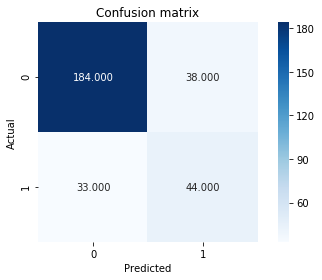

In [10]:
decision_tree(x_train, y_train)

Accuracy: 0.8193979933110368
Error: 0.1806020066889632
Precision: [0.8442623  0.70909091]
Recall: [0.92792793 0.50649351]
F1 Score: [0.88412017 0.59090909]


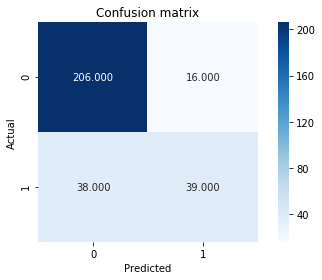

In [11]:
k_nearest_neighbors(x_train, y_train)

Accuracy: 0.7792642140468228
Error: 0.22073578595317722
Precision: [0.85135135 0.57142857]
Recall: [0.85135135 0.57142857]
F1 Score: [0.85135135 0.57142857]


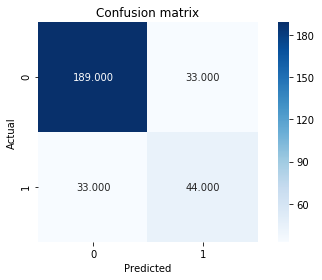

In [12]:
naive_bayes(x_train, y_train)

Accuracy: 0.8494983277591973
Error: 0.1505016722408027
Precision: [0.89333333 0.71621622]
Recall: [0.90540541 0.68831169]
F1 Score: [0.89932886 0.70198675]


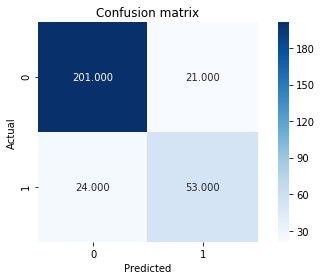

In [13]:
svm(x_train, y_train)

**Clearly SVM and Naive Bayes classifiers out-perform the others. However, the best would be the SVM because the data is skewed and non linear**